In [1]:
import matplotlib.pyplot as plt
from c7.Hockey import Hockey
from c7.c7_util import make_goal_pmf, make_goal_time_pmf
import common.util as util
from common.util import pmf_prob_less

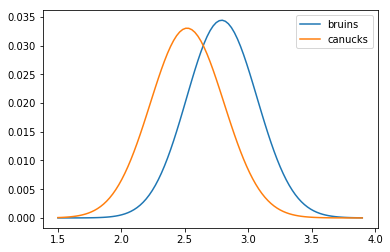

In [2]:
suite_bruins = Hockey('bruins')
suite_bruins.update_set([0, 2, 8, 4])
suite_canucks = Hockey('canucks')
suite_canucks.update_set([1, 3, 1, 0])
suite_bruins.plot_with([suite_canucks])

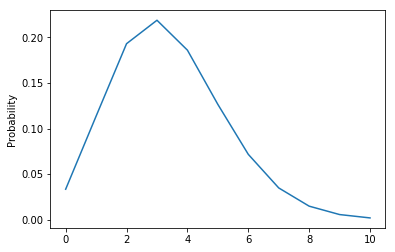

In [3]:
lam = 3.4
goal_dist = util.make_poisson_pmf(lam, 10)
goal_dist.plot()

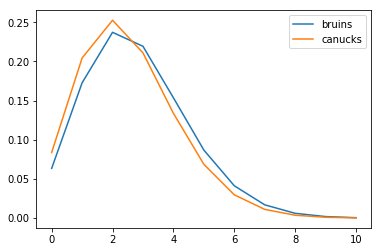

In [4]:
goal_dist_bruins = make_goal_pmf(suite_bruins)
goal_dist_canucks = make_goal_pmf(suite_canucks)
goal_dist_bruins.plot_with([goal_dist_canucks])

In [5]:
diff = goal_dist_bruins - goal_dist_canucks
p_win = diff.prob_greater(0)
p_loss = diff.prob_less(0)
p_tie = diff.prob(0)
print("p_win: {:.2f}, p_loss: {:.2f}, p_tie: {:.2f}".format(p_win, p_loss, p_tie))

p_win: 0.46, p_loss: 0.37, p_tie: 0.17


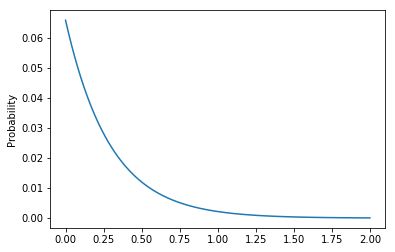

In [6]:
time_dist = util.make_exponential_pmf(lam=3.4, high=2, n=101)
time_dist.plot()

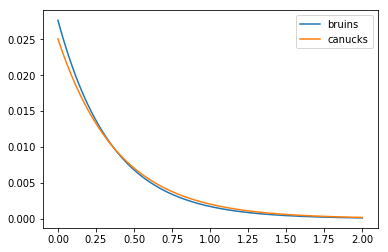

In [7]:
time_dist_bruins = make_goal_time_pmf(suite_bruins)
time_dist_canucks = make_goal_time_pmf(suite_canucks)
time_dist_bruins.plot_with([time_dist_canucks])

In [8]:
p_tie = diff.prob(0)
p_overtime = pmf_prob_less(time_dist_bruins, time_dist_canucks)
p_win = diff.prob_greater(0) + p_tie * p_overtime
print("p_win: {:.2f}, p_overtime: {:.2f}, p_tie: {:.2f}".format(p_win, p_overtime, p_tie))

p_win: 0.55, p_overtime: 0.52, p_tie: 0.17


In [9]:
p_series = p_win ** 2
p_series += 2 * p_win * (1 - p_win) * p_win
print("p_series = {:.2f}".format(p_series))

p_series = 0.57
